# 1.1 Zipf's Law

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils1 import load_dataset, counter, simple_tokenize

## Load datasets

In [2]:
name = "King James Bible"
text_kjb = load_dataset(name)
print(f"Loaded dataset '{name}' with {len(text_kjb)} characters")

name = "The Jungle Book"
text_tjb = load_dataset(name)
print(f"Loaded dataset '{name}' with {len(text_tjb)} characters")

text_setimes = load_dataset("SETIMES")["train"]
text_setimes_bg, text_setimes_tr = list(), list()
for x in text_setimes["translation"]:
    assert "\n" not in x["bg"] and "\n" not in x["tr"]
    text_setimes_bg.append(x["bg"])
    text_setimes_tr.append(x["tr"])
text_setimes_bg = "\n".join(text_setimes_bg)
text_setimes_tr = "\n".join(text_setimes_tr)

print(f"Loaded dataset SETIMES[bg-tr][bg] with {len(text_setimes_bg)} characters")
print(f"Loaded dataset SETIMES[bg-tr][tr] with {len(text_setimes_tr)} characters")

Loaded dataset 'King James Bible' with 4263602 characters
Loaded dataset 'The Jungle Book' with 311963 characters
Loaded dataset SETIMES[bg-tr][bg] with 28853278 characters
Loaded dataset SETIMES[bg-tr][tr] with 28946031 characters


In [3]:
counts_kjb, counts_tjb, counts_bg, counts_tr = map(
    lambda x: np.array(tuple(counter(simple_tokenize(x)).values())),
    [text_kjb, text_tjb, text_setimes_bg, text_setimes_tr],
)

## Plotting

In [4]:
def draw(counts: np.ndarray, ax_func, top_k: int = 0, **ax_func_kwargs) -> None:
    beg = end = None
    if top_k > 0:
        end = top_k
    elif top_k < 0:
        beg = top_k
    y = (counts / counts.sum())[beg:end]
    x = np.arange(len(y))
    ax_func(x, y, **ax_func_kwargs)

### Zipf's Law

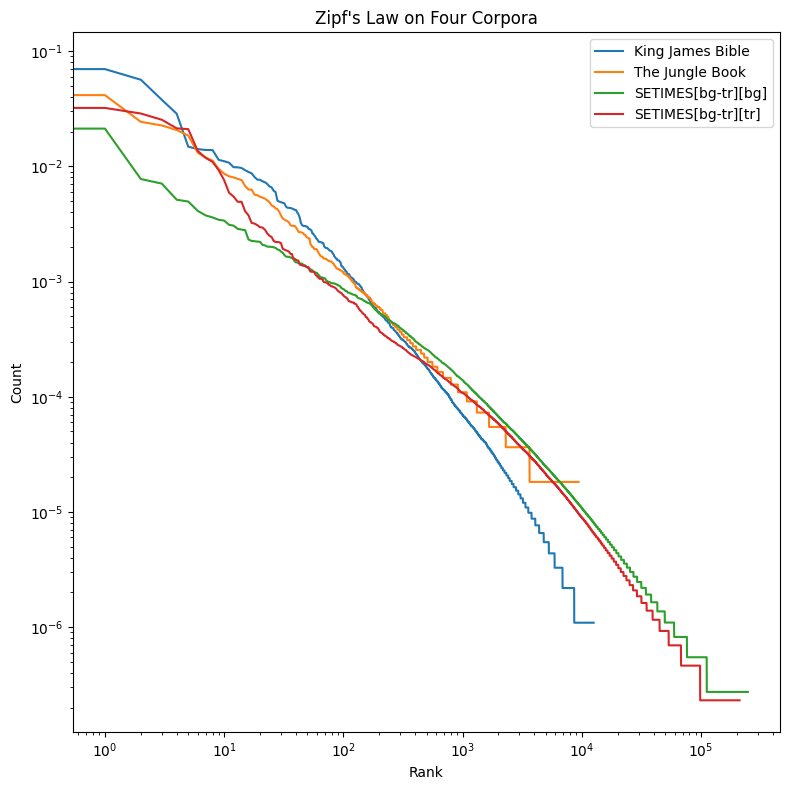

In [5]:
ax = plt.figure(figsize=[8, 8]).add_subplot()
draw(counts_kjb, ax.plot, label="King James Bible")
draw(counts_tjb, ax.plot, label="The Jungle Book")
draw(counts_tr, ax.plot, label="SETIMES[bg-tr][bg]")
draw(counts_bg, ax.plot, label="SETIMES[bg-tr][tr]")
ax.set_xscale("log"), ax.set_xlabel("Rank")
ax.set_yscale("log"), ax.set_ylabel("Count")
ax.legend()

plt.title("Zipf's Law on Four Corpora")
plt.tight_layout()
plt.show()

### Examine The TOP 20

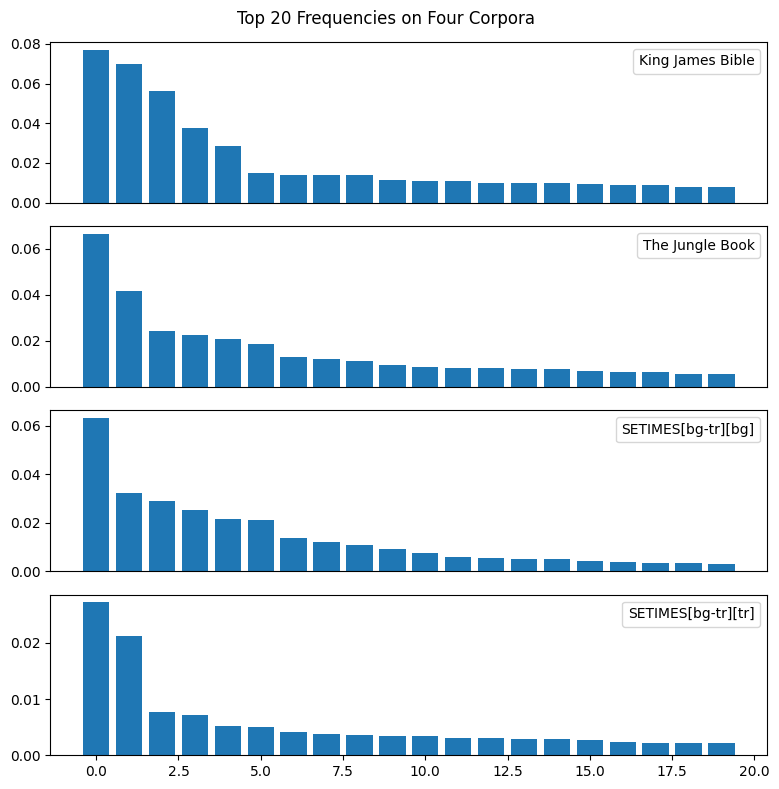

In [6]:
TOP_K = 20
def text_legend(text: str): plt.legend([text], loc="upper right", handlelength=0, handletextpad=0)

plt.figure(figsize=[8, 8])
draw(counts_kjb, plt.subplot(4, 1, 1).bar, top_k=TOP_K)
text_legend(f"King James Bible"), plt.xticks([])
draw(counts_tjb, plt.subplot(4, 1, 2).bar, top_k=TOP_K)
text_legend(f"The Jungle Book"), plt.xticks([])
draw(counts_bg, plt.subplot(4, 1, 3).bar, top_k=TOP_K)
text_legend(f"SETIMES[bg-tr][bg]"), plt.xticks([])
draw(counts_tr, plt.subplot(4, 1, 4).bar, top_k=TOP_K)
text_legend(f"SETIMES[bg-tr][tr]")
plt.suptitle(f"Top {TOP_K} Frequencies on Four Corpora")
plt.tight_layout()
plt.show()

### Check the Last 1000

In [7]:
CNT = 1000
# In all the four books, the least 1000 frequent words each occur only once.
for counts in [counts_kjb, counts_tjb, counts_bg, counts_tr]:
    assert sum(counts[-CNT:]) == CNT

## Discussion

- The Zipf's law is language-agnostic: it occurs in both English, Bulgarian, and Turkish, with similar curves.
- The curves do not present a perfect straight line:
  - For the upper-left, the changing rate of X-axis is too small, and the frequencies of the first few words do not strictly follow $F_{x} = 2*F_{x+1}$. Therefore, this section of the curve fluctuates significantly.
  - For the bottom-right, a lots of words occur only exactly one times, making the curve-tails appear completely flat.
  - The middle is relatively smooth, because it doesn't have the two problems mentioned above.